In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import mean_squared_error

In [67]:
X_train = pd.read_csv("MNIST_data/bindigit_trn.csv",header=None).as_matrix()
y_train = pd.read_csv("MNIST_data/targetdigit_trn.csv",header=None,names=["Label"]).as_matrix()

X_test = pd.read_csv("MNIST_data/bindigit_tst.csv",header=None).as_matrix()
y_test = pd.read_csv("MNIST_data/targetdigit_tst.csv",header=None,names=["Label"]).as_matrix()

In [34]:
#train_digits

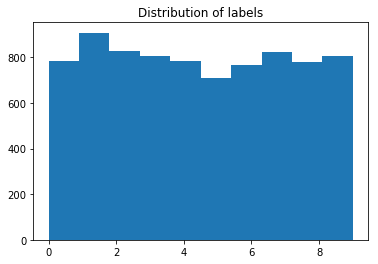

In [35]:
plt.hist(y_train)
plt.title("Distribution of labels")
plt.show()

In [36]:
y_train.shape

(8000, 1)

In [37]:
#Helper class for plotting images
def plotImage(images,predictions):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(predictions[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()    

In [74]:
def plotWeights(weights):
    n = weights.shape[0]  # how many digits we will display
    plt.figure(figsize=(20, 20))
    for i in range(n):
        # display weights
        ax = plt.subplot(10, 10, i + 1)
        plt.imshow(weights[i].reshape(28, 28))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Deep neural network architectures with restricted Boltzmann machines and autoencoders


## Autoencoder

In [38]:
from keras.layers import Input, Dense
from keras.models import Model

In [75]:
# this is the size of our encoded representations
encoding_dim = 50  #hidden nodes in compression layer

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder50 = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder50 = Model(input_img, encoded)

In [79]:
# this is the size of our encoded representations
encoding_dim = 75  #hidden nodes in compression layer

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder75 = Model(input_img, decoded)

In [78]:
# this is the size of our encoded representations
encoding_dim = 100  #hidden nodes in compression layer

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder100 = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder100 = Model(input_img, encoded)

In [42]:
# this is the size of our encoded representations
encoding_dim = 150  #hidden nodes in compression layer

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder150 = Model(input_img, decoded)

In [43]:
'''
#Separate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
'''

'\n#Separate encoder model\n# this model maps an input to its encoded representation\nencoder = Model(input_img, encoded)\n'

In [44]:
'''

#Separate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

'''

'\n\n#Separate decoder model\n# create a placeholder for an encoded (32-dimensional) input\nencoded_input = Input(shape=(encoding_dim,))\n# retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# create the decoder model\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\n\n'

In [95]:
autoencoder50.compile(optimizer='adadelta', loss='mean_squared_error')
encoder50.compile(optimizer='adadelta', loss='mean_squared_error')
autoencoder75.compile(optimizer='adadelta', loss='mean_squared_error')
autoencoder100.compile(optimizer='adadelta', loss='mean_squared_error')
encoder100.compile(optimizer='adadelta', loss='mean_squared_error')
autoencoder150.compile(optimizer='adadelta', loss='mean_squared_error')

## Training with 50 nodes, 200 epochs, batch size=32

In [122]:
history50 = autoencoder50.fit(X_train, X_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, X_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 158us/step - loss: 0.1726 - val_loss: 0.0980

In [47]:
history75 = autoencoder75.fit(X_train, X_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, X_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 145us/step - loss: 0.1806 - val_loss: 0.0989

In [129]:
history100 = autoencoder100.fit(X_train, X_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, X_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 182us/step - loss: 0.1727 - val_loss: 0.0968

In [49]:
history150 = autoencoder150.fit(X_train, X_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, X_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 2s 223us/step - loss: 0.1589 - val_loss: 0.0948

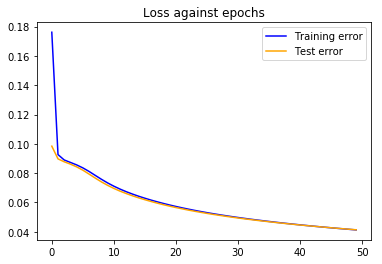

In [71]:
loss = history50.history['loss']
valLoss = history50.history['val_loss']
plt.plot(range(len(loss)),loss,color='b',label='Training error')
plt.plot(range(len(valLoss)),valLoss,color='orange',label='Test error')
plt.title('Loss against epochs')
plt.legend()
plt.show()

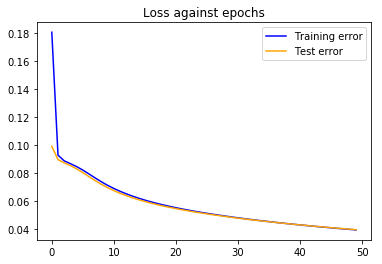

In [51]:
loss = history75.history['loss']
valLoss = history75.history['val_loss']
plt.plot(range(len(loss)),loss,color='b',label='Training error')
plt.plot(range(len(valLoss)),valLoss,color='orange',label='Test error')
plt.title('Loss against epochs')
plt.legend()
plt.show()

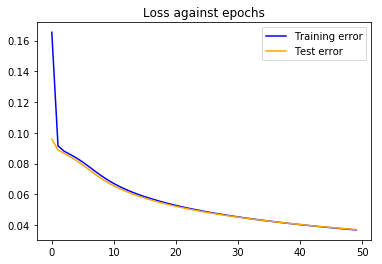

In [52]:
loss = history100.history['loss']
valLoss = history100.history['val_loss']
plt.plot(range(len(loss)),loss,color='b',label='Training error')
plt.plot(range(len(valLoss)),valLoss,color='orange',label='Test error')
plt.title('Loss against epochs')
plt.legend()
plt.show()

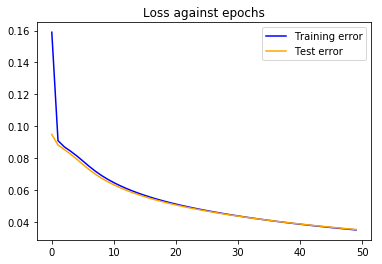

In [53]:
loss = history150.history['loss']
valLoss = history150.history['val_loss']
plt.plot(range(len(loss)),loss,color='b',label='Training error')
plt.plot(range(len(valLoss)),valLoss,color='orange',label='Test error')
plt.title('Loss against epochs')
plt.legend()
plt.show()

In [130]:
# encode and decode some digits
# note that we take them from the *test* set
#encoded_imgs = encoder.predict(X_test)
#decoded_imgs = decoder.predict(encoded_imgs)

pred50 = autoencoder50.predict(X_test)
pred75 = autoencoder75.predict(X_test)
pred100 = autoencoder100.predict(X_test)
pred150 = autoencoder150.predict(X_test)
#a50 = autoencoder.predict(X_test[:10,:])
#a150 = autoencoder.predict(X_test[:10,:])

## ?????

In [24]:
#DON'T TOUCH
#sampleDigits = [X_test[26],X_test[3],X_test[7],X_test[0],X_test[2],
#               X_test[1],X_test[15],X_test[8],X_test[6],X_test[5]]


#samplePredictions = [decoded_imgs[26],decoded_imgs[3],decoded_imgs[7],decoded_imgs[0],decoded_imgs[2],
#               decoded_imgs[1],decoded_imgs[15],decoded_imgs[8],decoded_imgs[6],decoded_imgs[5]]

#plotImage(X_test[:10,:],a)

## Printed digits for all predictions

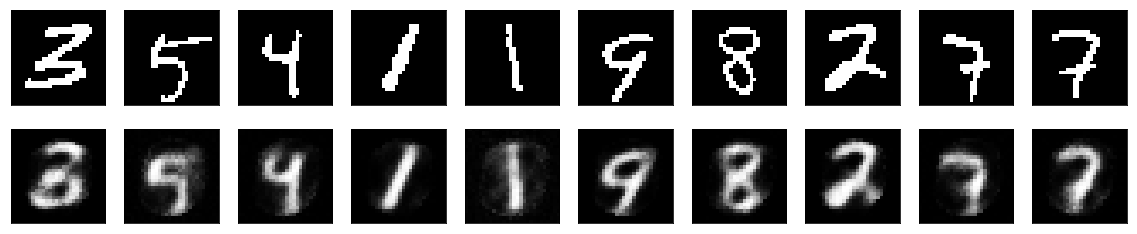

In [124]:
plotImage(X_test[:10,:],pred50)

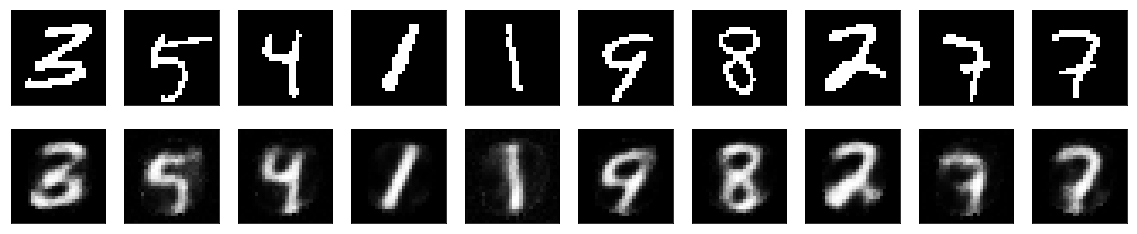

In [59]:
plotImage(X_test[:10,:],pred75)

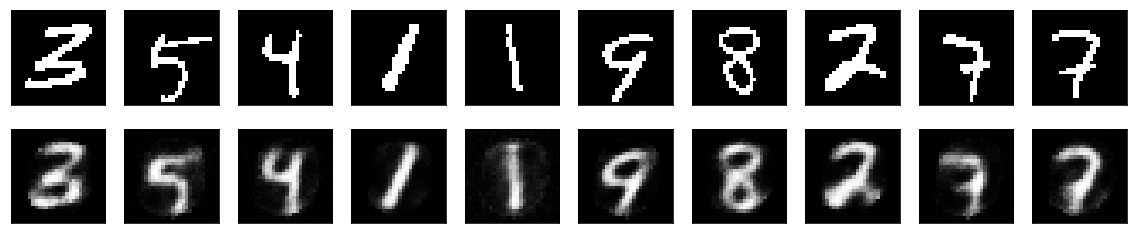

In [131]:
plotImage(X_test[:10,:],pred100)

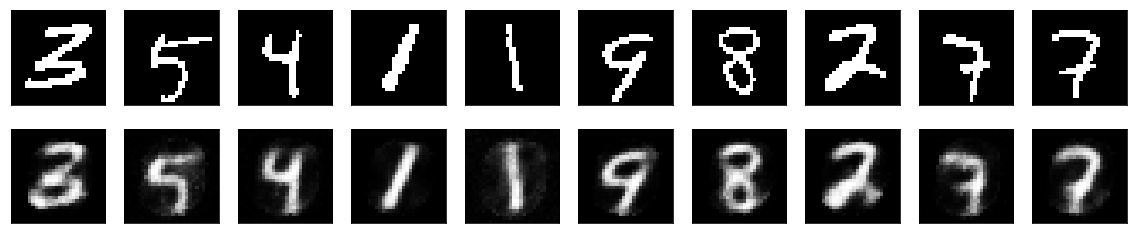

In [61]:
plotImage(X_test[:10,:],pred150)

In [27]:
#apa = encoder.get_weights()
#plotImage(apa[0].T[:10,:],apa[0].T[10:20,:])

In [28]:
#Calculate mean squared error
mse50 = mean_squared_error(X_test,pred50)
mse75 = mean_squared_error(X_test,pred75)
mse100 = mean_squared_error(X_test,pred100)
mse150 = mean_squared_error(X_test,pred150)
print(mse50)
print(mse75)
print(mse100)
print(mse150)

0.0414740007542
0.0394403994281
0.0381759575788
0.0350180358063


In [132]:
weights50 = autoencoder50.get_weights()[0].T
weights100 = autoencoder100.get_weights()[0].T

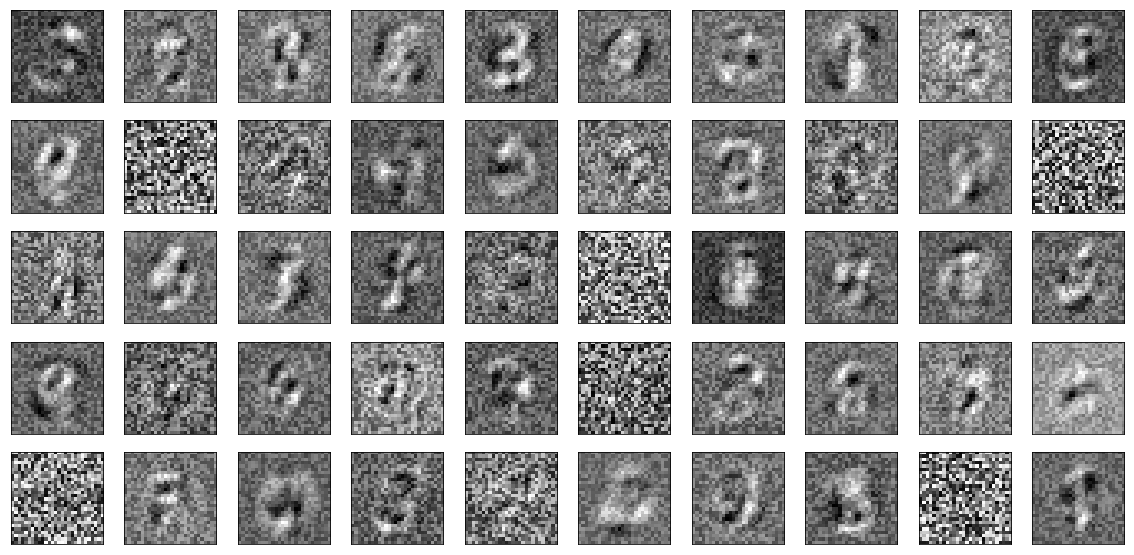

In [128]:
plotWeights(weights50)

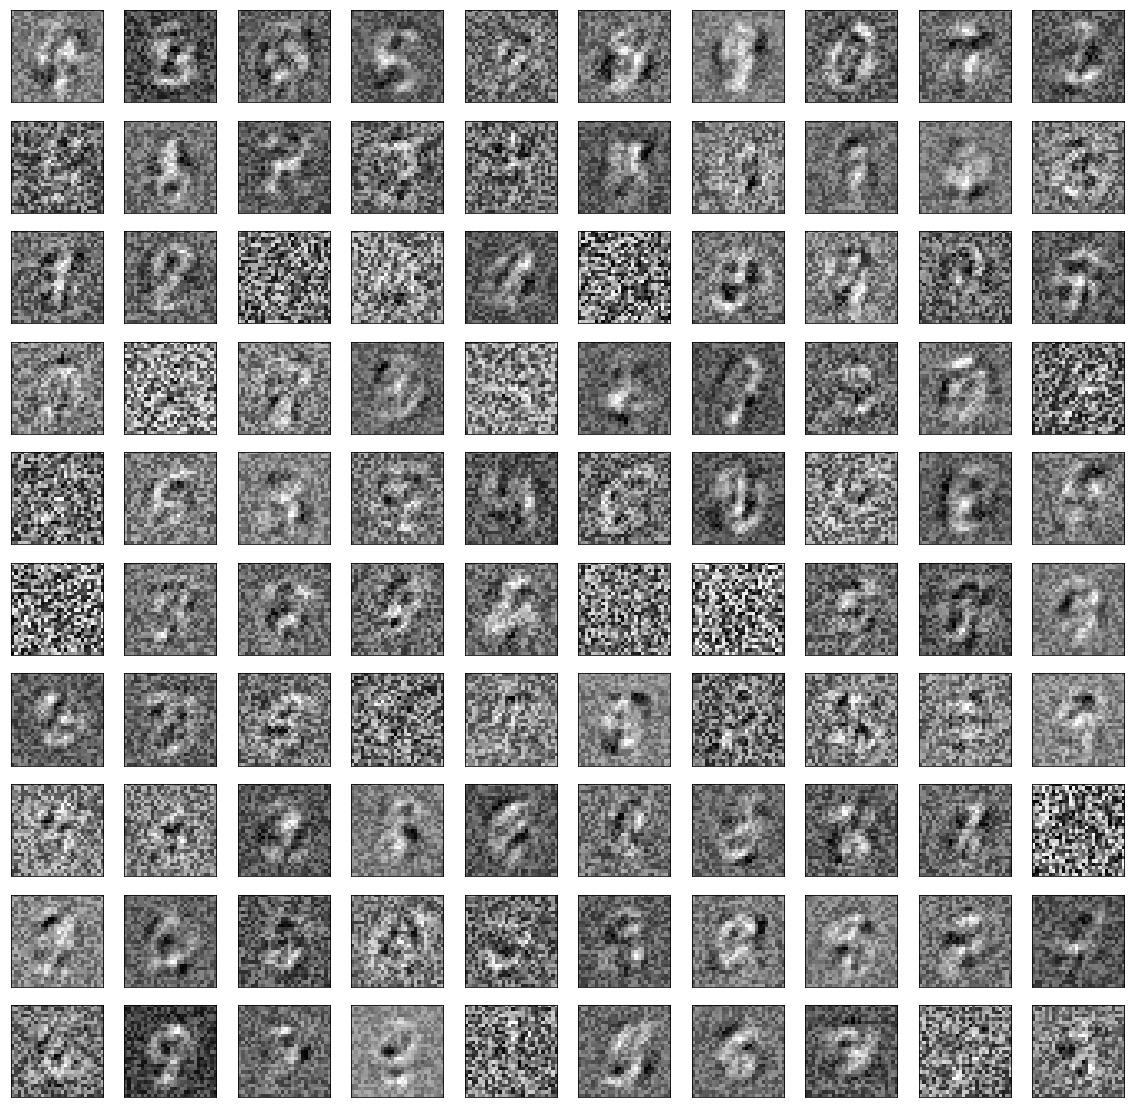

In [133]:
plotWeights(weights100)